In [36]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri,r,numpy2ri
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import GEOparse
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
import scipy.stats as pystats
from rpy2.robjects.vectors import StrVector
import multiprocessing

In [2]:
# Load required R packages
WGCNA = importr("WGCNA")
DESeq2 = importr("DESeq2")
stats = importr("stats")
base = importr('base')


In [3]:
# Allow multi-threading
WGCNA.allowWGCNAThreads()

Allowing multi-threading with up to 12 threads.


12


In [4]:
data = pd.read_csv("E:/ASEB/2nd Year/4th/Bio/End Sems/GSE36961_non-normalized.txt", sep="\t").T
data.columns = data.iloc[0]
data = data[:].T
data = data.drop(data.filter(like='Pval').columns, axis=1)

# Display the resulting DataFrame
data.head()

,ID_REF,653513_mRNA,647527_mRNA,634021_mRNA,43_mRNA,5059_mRNA,2158_mRNA,46_mRNA,25_mRNA,644621_mRNA,...,647526_mRNA,635265_mRNA,4049_mRNA,4152_mRNA,671852_mRNA,5033_mRNA,R58_mRNA,673482_mRNA,R656518_mRNA,R59_mRNA
ID_REF,,,,,,,,,,,,,,,,,,,,,
7A5,7A5,65.29057,62.31787,61.56281,60.8467,64.96912,74.80866,58.7639,54.23415,76.22506,...,56.46409,62.36212,59.65278,56.93419,65.7456,61.72684,58.14715,61.0317,65.01752,61.39564
A1BG,A1BG,81.10231,69.69264,70.10897,60.96588,70.82362,76.30508,70.42997,67.50185,76.48309,...,62.34427,57.0758,72.13431,70.49693,76.94215,71.93469,76.30377,69.85197,76.24279,69.48135
A1CF,A1CF,81.45553,67.15081,70.21436,75.43973,67.28829,73.51493,60.10391,70.13483,68.08152,...,61.18286,65.32533,62.6037,68.20814,66.64779,59.00509,62.82897,62.38643,67.50954,66.82999
A26A1,A26A1,64.55132,71.03593,61.28361,63.37952,66.16459,72.36303,65.30563,61.3966,58.95061,...,62.71857,70.4472,59.43178,56.12112,70.34036,62.61597,65.13914,61.04878,64.0183,62.57026
A26B1,A26B1,57.29808,70.1785,65.27797,50.81472,52.81135,63.78223,65.24652,57.24791,60.30733,...,56.74057,59.53376,57.99358,67.41944,73.47861,66.71329,65.59566,63.98689,59.39391,60.83633


In [5]:
geo_id = "GSE36961"
gse = GEOparse.get_GEO(geo_id, destdir="./")
phenoData = pd.DataFrame(gse.phenotype_data)
phenoData = phenoData.iloc[:,[0,1,13,10,27]]

pd.options.display.max_columns = None
phenoData['title'] = data.columns[1:]
phenoData['characteristics_ch1.3.disease state'].fillna('Healthy',inplace = True)
phenoData.columns = phenoData.columns.str.replace('characteristics_ch1.3.', '')
phenoData.columns = phenoData.columns.str.replace('characteristics_ch1.0.', '')
phenoData

28-Jun-2023 08:56:01 DEBUG utils - Directory ./ already exists. Skipping.
28-Jun-2023 08:56:01 INFO GEOparse - File already exist: using local version.
28-Jun-2023 08:56:01 INFO GEOparse - Parsing ./GSE36961_family.soft.gz: 
28-Jun-2023 08:56:01 DEBUG GEOparse - DATABASE: GeoMiame
28-Jun-2023 08:56:01 DEBUG GEOparse - SERIES: GSE36961
28-Jun-2023 08:56:01 DEBUG GEOparse - PLATFORM: GPL15389
28-Jun-2023 08:56:01 DEBUG GEOparse - SAMPLE: GSM907203
28-Jun-2023 08:56:01 DEBUG GEOparse - SAMPLE: GSM907204
28-Jun-2023 08:56:01 DEBUG GEOparse - SAMPLE: GSM907205
28-Jun-2023 08:56:01 DEBUG GEOparse - SAMPLE: GSM907206
28-Jun-2023 08:56:01 DEBUG GEOparse - SAMPLE: GSM907207
28-Jun-2023 08:56:01 DEBUG GEOparse - SAMPLE: GSM907208
28-Jun-2023 08:56:01 DEBUG GEOparse - SAMPLE: GSM907209
28-Jun-2023 08:56:01 DEBUG GEOparse - SAMPLE: GSM907210
28-Jun-2023 08:56:01 DEBUG GEOparse - SAMPLE: GSM907211
28-Jun-2023 08:56:02 DEBUG GEOparse - SAMPLE: GSM907212
28-Jun-2023 08:56:02 DEBUG GEOparse - SAMPLE: 

28-Jun-2023 08:56:13 DEBUG GEOparse - SAMPLE: GSM907343
28-Jun-2023 08:56:13 DEBUG GEOparse - SAMPLE: GSM907344
28-Jun-2023 08:56:13 DEBUG GEOparse - SAMPLE: GSM907345
28-Jun-2023 08:56:13 DEBUG GEOparse - SAMPLE: GSM907346
28-Jun-2023 08:56:13 DEBUG GEOparse - SAMPLE: GSM907347
C:\Users\Prahas\AppData\Local\Temp\ipykernel_21440\1477630121.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  phenoData.columns = phenoData.columns.str.replace('characteristics_ch1.3.', '')
C:\Users\Prahas\AppData\Local\Temp\ipykernel_21440\1477630121.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  phenoData.columns = phenoData.columns.str.replace('characteristics_ch1.0.', '')


,title,geo_accession,disease state,Sex,contact_city
GSM907203,653513_mRNA,GSM907203,hypertrophic cardiomyopathy (HCM),male,Rochester
GSM907204,647527_mRNA,GSM907204,hypertrophic cardiomyopathy (HCM),male,Rochester
GSM907205,634021_mRNA,GSM907205,hypertrophic cardiomyopathy (HCM),female,Rochester
GSM907206,43_mRNA,GSM907206,hypertrophic cardiomyopathy (HCM),male,Rochester
GSM907207,5059_mRNA,GSM907207,hypertrophic cardiomyopathy (HCM),female,Rochester
...,...,...,...,...,...
GSM907343,5033_mRNA,GSM907343,Healthy,female,Rochester
GSM907344,R58_mRNA,GSM907344,Healthy,male,Rochester
GSM907345,673482_mRNA,GSM907345,Healthy,male,Rochester
GSM907346,R656518_mRNA,GSM907346,Healthy,male,Rochester


In [6]:
# Prepare data
data = pd.melt(data, id_vars='ID_REF', var_name='samples', value_name='counts')
data['samples'] = data['samples'].str.replace(',', '-', regex=False)
data = data.merge(phenoData, left_on='samples', right_on='title')
data = data[['ID_REF', 'geo_accession', 'counts']].pivot(index='ID_REF', columns='geo_accession', values='counts')
pd.options.display.max_rows = None
data = data.astype(float)

data.head()

geo_accession,GSM907203,GSM907204,GSM907205,GSM907206,GSM907207,GSM907208,GSM907209,GSM907210,GSM907211,GSM907212,GSM907213,GSM907214,GSM907215,GSM907216,GSM907217,GSM907218,GSM907219,GSM907220,GSM907221,GSM907222,GSM907223,GSM907224,GSM907225,GSM907226,GSM907227,GSM907228,GSM907229,GSM907230,GSM907231,GSM907232,GSM907233,GSM907234,GSM907235,GSM907236,GSM907237,GSM907238,GSM907239,GSM907240,GSM907241,GSM907242,GSM907243,GSM907244,GSM907245,GSM907246,GSM907247,GSM907248,GSM907249,GSM907250,GSM907251,GSM907252,GSM907253,GSM907254,GSM907255,GSM907256,GSM907257,GSM907258,GSM907259,GSM907260,GSM907261,GSM907262,GSM907263,GSM907264,GSM907265,GSM907266,GSM907267,GSM907268,GSM907269,GSM907270,GSM907271,GSM907272,GSM907273,GSM907274,GSM907275,GSM907276,GSM907277,GSM907278,GSM907279,GSM907280,GSM907281,GSM907282,GSM907283,GSM907284,GSM907285,GSM907286,GSM907287,GSM907288,GSM907289,GSM907290,GSM907291,GSM907292,GSM907293,GSM907294,GSM907295,GSM907296,GSM907297,GSM907298,GSM907299,GSM907300,GSM907301,GSM907302,GSM907303,GSM907304,GSM907305,GSM907306,GSM907307,GSM907308,GSM907309,GSM907310,GSM907311,GSM907312,GSM907313,GSM907314,GSM907315,GSM907316,GSM907317,GSM907318,GSM907319,GSM907320,GSM907321,GSM907322,GSM907323,GSM907324,GSM907325,GSM907326,GSM907327,GSM907328,GSM907329,GSM907330,GSM907331,GSM907332,GSM907333,GSM907334,GSM907335,GSM907336,GSM907337,GSM907338,GSM907339,GSM907340,GSM907341,GSM907342,GSM907343,GSM907344,GSM907345,GSM907346,GSM907347
ID_REF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7A5,65.29057,62.31787,61.56281,60.84670,64.96912,74.80866,58.76390,54.23415,76.22506,62.10956,62.69334,58.54863,58.06770,56.97955,66.10465,59.20961,60.72915,70.62639,56.80436,64.56814,78.15814,74.49504,68.60240,58.16958,69.36259,58.40417,63.71593,67.94057,63.96039,69.34713,61.68852,64.81268,66.01112,54.25367,60.50505,52.44871,64.53335,64.49588,55.05366,58.81314,66.73283,61.39533,57.68219,55.76287,71.09457,56.43701,59.89408,56.56976,59.93680,49.85187,54.92993,58.41692,65.41371,60.96426,53.63340,72.56416,60.65953,67.16879,64.73169,60.70858,67.72549,63.90305,73.16888,67.28812,65.36741,64.21497,62.65029,65.27583,63.82570,55.30007,68.25024,76.27230,67.45269,57.50999,54.90535,55.92346,63.92560,53.28917,59.47027,60.14693,52.30537,64.39246,62.58740,54.98512,53.17781,69.94141,61.37391,69.21944,82.10519,71.24609,71.40573,58.23240,58.83361,63.89175,69.13395,53.80500,64.73736,62.65997,51.36032,60.34590,57.46158,51.36549,64.68721,97.19249,71.14939,66.95348,61.36636,73.19765,67.49792,74.79422,78.13251,69.59505,65.18533,77.76862,52.28429,59.91814,53.11614,69.76200,53.14492,56.84196,58.75380,65.36099,63.83615,60.84842,66.04089,83.26381,59.23740,74.16775,61.20929,67.23274,57.53767,69.77493,68.28503,64.96378,62.29540,56.46409,62.36212,59.65278,56.93419,65.74560,61.72684,58.14715,61.03170,65.01752,61.39564
A1BG,81.10231,69.69264,70.10897,60.96588,70.82362,76.30508,70.42997,67.50185,76.48309,61.57887,67.03207,64.97902,69.26588,83.93068,70.15062,66.58295,61.78551,65.42224,64.16644,79.09004,83.50323,81.12671,81.01392,72.29181,80.56789,73.17577,78.99736,71.48633,71.16487,66.71101,77.72713,82.06836,74.88272,61.67918,68.57768,84.36162,74.97314,72.11663,71.91394,64.37760,84.46202,75.82329,75.45969,76.18250,74.59608,69.26941,72.03682,65.07060,74.67287,56.66161,58.38717,70.65753,67.79871,72.36040,71.45992,70.08684,80.73891,66.50095,76.84919,72.31776,57.76955,71.16707,86.66562,75.96875,72.05340,76.28433,67.46185,72.48373,91.04869,91.42743,77.57180,73.06989,87.32039,84.26827,72.42001,67.90550,71.21426,71.84113,73.13554,70.46868,72.70982,80.95490,79.13446,66.58790,79.89113,96.21786,91.14946,75.36514,72.49816,79.20798,79.10893,93.33739,74.80870,78.84186,74.66008,70.94264,72.85101,83.05211,78.15770,71.00452,88.00652,66.82336,70.21127,114.88910,77.84131,76.33004,82.19858,81.29316,80.47512,77.90018,87.08379,66.72905,79.18275,79.31148,76.07393,83.02915,86.19357,79.53725,66.1596

In [7]:
# Convert data to R dataframe
pandas2ri.activate()
data_r = pandas2ri.py2rpy(data)

In [8]:
# 2. QC - Outlier detection -------------------------------------
# Detect outlier genes
gsg = WGCNA.goodSamplesGenes(data_r)
gsg_summary = robjects.r['summary'](gsg)
gsg_allOK = np.array(gsg_summary)[0] if len(gsg_summary) > 0 else None
print("allOK Samples: ",gsg_allOK)
gsg_r = robjects.conversion.py2rpy(gsg)

 Flagging genes and samples with too many missing values...
  ..step 1
allOK Samples:    145


In [9]:
# Get 'goodGenes' and 'goodSamples' tables
gsg_goodGenes_table = pd.DataFrame(robjects.r['table'](gsg_r.rx2('goodGenes')))
gsg_goodSamples_table = pd.DataFrame(robjects.r['table'](gsg_r.rx2('goodSamples')))

In [10]:
# Filter data using goodGenes
goodGenes = robjects.vectors.BoolVector(gsg_goodGenes_table[0])
data_r = data_r.rx(goodGenes, True)
# Convert data_r_filtered back to a pandas DataFrame
data = pd.DataFrame(robjects.conversion.rpy2py(data_r))
data.head()

,GSM907203,GSM907204,GSM907205,GSM907206,GSM907207,GSM907208,GSM907209,GSM907210,GSM907211,GSM907212,GSM907213,GSM907214,GSM907215,GSM907216,GSM907217,GSM907218,GSM907219,GSM907220,GSM907221,GSM907222,GSM907223,GSM907224,GSM907225,GSM907226,GSM907227,GSM907228,GSM907229,GSM907230,GSM907231,GSM907232,GSM907233,GSM907234,GSM907235,GSM907236,GSM907237,GSM907238,GSM907239,GSM907240,GSM907241,GSM907242,GSM907243,GSM907244,GSM907245,GSM907246,GSM907247,GSM907248,GSM907249,GSM907250,GSM907251,GSM907252,GSM907253,GSM907254,GSM907255,GSM907256,GSM907257,GSM907258,GSM907259,GSM907260,GSM907261,GSM907262,GSM907263,GSM907264,GSM907265,GSM907266,GSM907267,GSM907268,GSM907269,GSM907270,GSM907271,GSM907272,GSM907273,GSM907274,GSM907275,GSM907276,GSM907277,GSM907278,GSM907279,GSM907280,GSM907281,GSM907282,GSM907283,GSM907284,GSM907285,GSM907286,GSM907287,GSM907288,GSM907289,GSM907290,GSM907291,GSM907292,GSM907293,GSM907294,GSM907295,GSM907296,GSM907297,GSM907298,GSM907299,GSM907300,GSM907301,GSM907302,GSM907303,GSM907304,GSM907305,GSM907306,GSM907307,GSM907308,GSM907309,GSM907310,GSM907311,GSM907312,GSM907313,GSM907314,GSM907315,GSM907316,GSM907317,GSM907318,GSM907319,GSM907320,GSM907321,GSM907322,GSM907323,GSM907324,GSM907325,GSM907326,GSM907327,GSM907328,GSM907329,GSM907330,GSM907331,GSM907332,GSM907333,GSM907334,GSM907335,GSM907336,GSM907337,GSM907338,GSM907339,GSM907340,GSM907341,GSM907342,GSM907343,GSM907344,GSM907345,GSM907346,GSM907347
7A5,65.29057,62.31787,61.56281,60.84670,64.96912,74.80866,58.76390,54.23415,76.22506,62.10956,62.69334,58.54863,58.06770,56.97955,66.10465,59.20961,60.72915,70.62639,56.80436,64.56814,78.15814,74.49504,68.60240,58.16958,69.36259,58.40417,63.71593,67.94057,63.96039,69.34713,61.68852,64.81268,66.01112,54.25367,60.50505,52.44871,64.53335,64.49588,55.05366,58.81314,66.73283,61.39533,57.68219,55.76287,71.09457,56.43701,59.89408,56.56976,59.93680,49.85187,54.92993,58.41692,65.41371,60.96426,53.63340,72.56416,60.65953,67.16879,64.73169,60.70858,67.72549,63.90305,73.16888,67.28812,65.36741,64.21497,62.65029,65.27583,63.82570,55.30007,68.25024,76.27230,67.45269,57.50999,54.90535,55.92346,63.92560,53.28917,59.47027,60.14693,52.30537,64.39246,62.58740,54.98512,53.17781,69.94141,61.37391,69.21944,82.10519,71.24609,71.40573,58.23240,58.83361,63.89175,69.13395,53.80500,64.73736,62.65997,51.36032,60.34590,57.46158,51.36549,64.68721,97.19249,71.14939,66.95348,61.36636,73.19765,67.49792,74.79422,78.13251,69.59505,65.18533,77.76862,52.28429,59.91814,53.11614,69.76200,53.14492,56.84196,58.75380,65.36099,63.83615,60.84842,66.04089,83.26381,59.23740,74.16775,61.20929,67.23274,57.53767,69.77493,68.28503,64.96378,62.29540,56.46409,62.36212,59.65278,56.93419,65.74560,61.72684,58.14715,61.03170,65.01752,61.39564
A1BG,81.10231,69.69264,70.10897,60.96588,70.82362,76.30508,70.42997,67.50185,76.48309,61.57887,67.03207,64.97902,69.26588,83.93068,70.15062,66.58295,61.78551,65.42224,64.16644,79.09004,83.50323,81.12671,81.01392,72.29181,80.56789,73.17577,78.99736,71.48633,71.16487,66.71101,77.72713,82.06836,74.88272,61.67918,68.57768,84.36162,74.97314,72.11663,71.91394,64.37760,84.46202,75.82329,75.45969,76.18250,74.59608,69.26941,72.03682,65.07060,74.67287,56.66161,58.38717,70.65753,67.79871,72.36040,71.45992,70.08684,80.73891,66.50095,76.84919,72.31776,57.76955,71.16707,86.66562,75.96875,72.05340,76.28433,67.46185,72.48373,91.04869,91.42743,77.57180,73.06989,87.32039,84.26827,72.42001,67.90550,71.21426,71.84113,73.13554,70.46868,72.70982,80.95490,79.13446,66.58790,79.89113,96.21786,91.14946,75.36514,72.49816,79.20798,79.10893,93.33739,74.80870,78.84186,74.66008,70.94264,72.85101,83.05211,78.15770,71.00452,88.00652,66.82336,70.21127,114.88910,77.84131,76.33004,82.19858,81.29316,80.47512,77.90018,87.08379,66.72905,79.18275,79.31148,76.07393,83.02915,86.19357,79.53725,66.15965,74.00019,72.74054,66.68317,81.21529,65.37389,85.47658,86.88130,83.30402,86.10332,68.85721,72.92045,80.97088,81.10208,74.31165,77.06239,68.13811,62.34427,57.07580,7

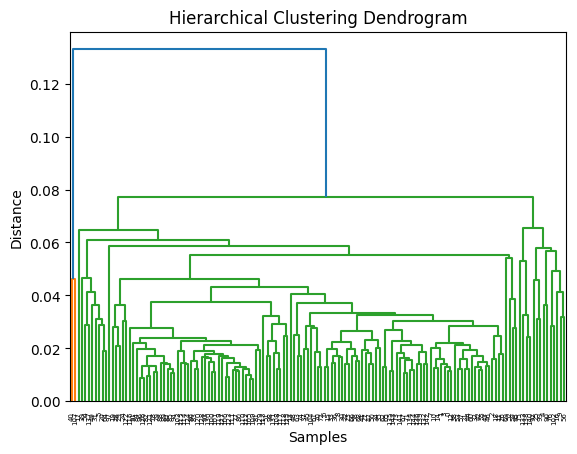

In [11]:
# Detect outlier samples - hierarchical clustering
distance_matrix = sch.distance.pdist(data.T, metric='correlation')
htree = sch.linkage(distance_matrix, method='average')
dendrogram = sch.dendrogram(htree)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

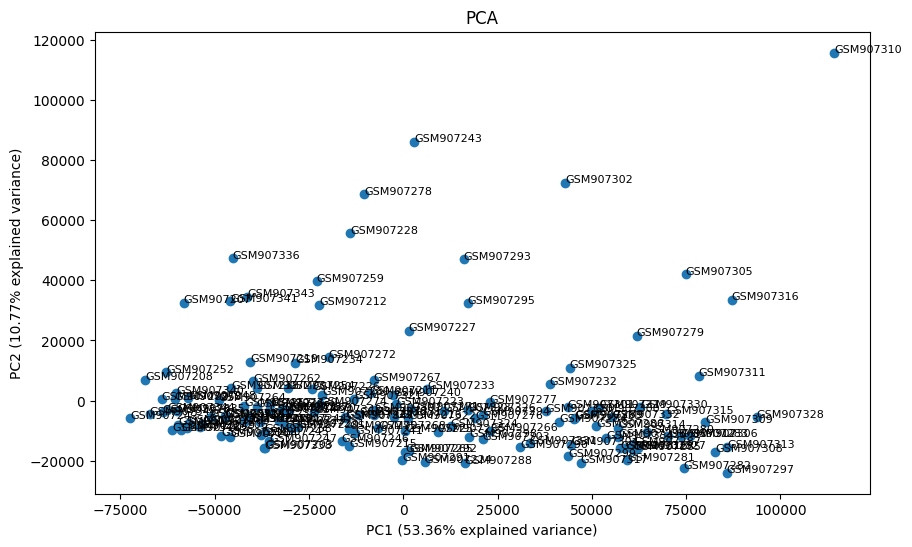

In [12]:
# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(data.T)

# Access PCA results
pca_dat = pd.DataFrame(pca_result, columns=['PC{}'.format(i+1) for i in range(pca_result.shape[1])])

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot PCA with labels
plt.figure(figsize=(10, 6))
plt.scatter(pca_dat['PC1'], pca_dat['PC2'])

# Add labels to the scatter plot
for i, (x, y) in enumerate(zip(pca_dat['PC1'], pca_dat['PC2'])):
    plt.text(x, y, data.columns[i], fontsize=8)

plt.xlabel('PC1 ({}% explained variance)'.format(round(explained_variance_ratio[0] * 100, 2)))
plt.ylabel('PC2 ({}% explained variance)'.format(round(explained_variance_ratio[1] * 100, 2)))
plt.title('PCA')
plt.show()

In [13]:
# Exclude outlier samples
samples_to_be_excluded = ['GSM907278', 'GSM907302', 'GSM907243','GSM907310','GSM907228']
data_subset = data.loc[:, ~data.columns.isin(samples_to_be_excluded)]
data_subset.head()

,GSM907203,GSM907204,GSM907205,GSM907206,GSM907207,GSM907208,GSM907209,GSM907210,GSM907211,GSM907212,GSM907213,GSM907214,GSM907215,GSM907216,GSM907217,GSM907218,GSM907219,GSM907220,GSM907221,GSM907222,GSM907223,GSM907224,GSM907225,GSM907226,GSM907227,GSM907229,GSM907230,GSM907231,GSM907232,GSM907233,GSM907234,GSM907235,GSM907236,GSM907237,GSM907238,GSM907239,GSM907240,GSM907241,GSM907242,GSM907244,GSM907245,GSM907246,GSM907247,GSM907248,GSM907249,GSM907250,GSM907251,GSM907252,GSM907253,GSM907254,GSM907255,GSM907256,GSM907257,GSM907258,GSM907259,GSM907260,GSM907261,GSM907262,GSM907263,GSM907264,GSM907265,GSM907266,GSM907267,GSM907268,GSM907269,GSM907270,GSM907271,GSM907272,GSM907273,GSM907274,GSM907275,GSM907276,GSM907277,GSM907279,GSM907280,GSM907281,GSM907282,GSM907283,GSM907284,GSM907285,GSM907286,GSM907287,GSM907288,GSM907289,GSM907290,GSM907291,GSM907292,GSM907293,GSM907294,GSM907295,GSM907296,GSM907297,GSM907298,GSM907299,GSM907300,GSM907301,GSM907303,GSM907304,GSM907305,GSM907306,GSM907307,GSM907308,GSM907309,GSM907311,GSM907312,GSM907313,GSM907314,GSM907315,GSM907316,GSM907317,GSM907318,GSM907319,GSM907320,GSM907321,GSM907322,GSM907323,GSM907324,GSM907325,GSM907326,GSM907327,GSM907328,GSM907329,GSM907330,GSM907331,GSM907332,GSM907333,GSM907334,GSM907335,GSM907336,GSM907337,GSM907338,GSM907339,GSM907340,GSM907341,GSM907342,GSM907343,GSM907344,GSM907345,GSM907346,GSM907347
7A5,65.29057,62.31787,61.56281,60.84670,64.96912,74.80866,58.76390,54.23415,76.22506,62.10956,62.69334,58.54863,58.06770,56.97955,66.10465,59.20961,60.72915,70.62639,56.80436,64.56814,78.15814,74.49504,68.60240,58.16958,69.36259,63.71593,67.94057,63.96039,69.34713,61.68852,64.81268,66.01112,54.25367,60.50505,52.44871,64.53335,64.49588,55.05366,58.81314,61.39533,57.68219,55.76287,71.09457,56.43701,59.89408,56.56976,59.93680,49.85187,54.92993,58.41692,65.41371,60.96426,53.63340,72.56416,60.65953,67.16879,64.73169,60.70858,67.72549,63.90305,73.16888,67.28812,65.36741,64.21497,62.65029,65.27583,63.82570,55.30007,68.25024,76.27230,67.45269,57.50999,54.90535,63.92560,53.28917,59.47027,60.14693,52.30537,64.39246,62.58740,54.98512,53.17781,69.94141,61.37391,69.21944,82.10519,71.24609,71.40573,58.23240,58.83361,63.89175,69.13395,53.80500,64.73736,62.65997,51.36032,57.46158,51.36549,64.68721,97.19249,71.14939,66.95348,61.36636,67.49792,74.79422,78.13251,69.59505,65.18533,77.76862,52.28429,59.91814,53.11614,69.76200,53.14492,56.84196,58.75380,65.36099,63.83615,60.84842,66.04089,83.26381,59.23740,74.16775,61.20929,67.23274,57.53767,69.77493,68.28503,64.96378,62.29540,56.46409,62.36212,59.65278,56.93419,65.74560,61.72684,58.14715,61.03170,65.01752,61.39564
A1BG,81.10231,69.69264,70.10897,60.96588,70.82362,76.30508,70.42997,67.50185,76.48309,61.57887,67.03207,64.97902,69.26588,83.93068,70.15062,66.58295,61.78551,65.42224,64.16644,79.09004,83.50323,81.12671,81.01392,72.29181,80.56789,78.99736,71.48633,71.16487,66.71101,77.72713,82.06836,74.88272,61.67918,68.57768,84.36162,74.97314,72.11663,71.91394,64.37760,75.82329,75.45969,76.18250,74.59608,69.26941,72.03682,65.07060,74.67287,56.66161,58.38717,70.65753,67.79871,72.36040,71.45992,70.08684,80.73891,66.50095,76.84919,72.31776,57.76955,71.16707,86.66562,75.96875,72.05340,76.28433,67.46185,72.48373,91.04869,91.42743,77.57180,73.06989,87.32039,84.26827,72.42001,71.21426,71.84113,73.13554,70.46868,72.70982,80.95490,79.13446,66.58790,79.89113,96.21786,91.14946,75.36514,72.49816,79.20798,79.10893,93.33739,74.80870,78.84186,74.66008,70.94264,72.85101,83.05211,78.15770,88.00652,66.82336,70.21127,114.88910,77.84131,76.33004,82.19858,80.47512,77.90018,87.08379,66.72905,79.18275,79.31148,76.07393,83.02915,86.19357,79.53725,66.15965,74.00019,72.74054,66.68317,81.21529,65.37389,85.47658,86.88130,83.30402,86.10332,68.85721,72.92045,80.97088,81.10208,74.31165,77.06239,68.13811,62.34427,57.07580,72.13431,70.49693,76.94215,71.93469,76.30377,69.85197,76.24279,69.48135
A1CF,81.45553,67.15081,70.21436,75.43973,67.28829,73.51493,60.10391,7

In [14]:
# 3. Normalization ----------------------------------------------
# Create DESeq2 dataset

# Exclude outlier samples from colData
colData = phenoData[~phenoData.index.isin(samples_to_be_excluded)]
colData.columns = [name.replace(' ', '_') for name in colData.columns]
colData.columns = colData.columns.astype(str)
colData

,title,geo_accession,disease_state,Sex,contact_city
GSM907203,653513_mRNA,GSM907203,hypertrophic cardiomyopathy (HCM),male,Rochester
GSM907204,647527_mRNA,GSM907204,hypertrophic cardiomyopathy (HCM),male,Rochester
GSM907205,634021_mRNA,GSM907205,hypertrophic cardiomyopathy (HCM),female,Rochester
GSM907206,43_mRNA,GSM907206,hypertrophic cardiomyopathy (HCM),male,Rochester
GSM907207,5059_mRNA,GSM907207,hypertrophic cardiomyopathy (HCM),female,Rochester
GSM907208,2158_mRNA,GSM907208,hypertrophic cardiomyopathy (HCM),male,Rochester
GSM907209,46_mRNA,GSM907209,hypertrophic cardiomyopathy (HCM),male,Rochester
GSM907210,25_mRNA,GSM907210,hypertrophic cardiomyopathy (HCM),female,Rochester
GSM907211,644621_mRNA,GSM907211,hypertrophic cardiomyopathy (HCM),male,Rochester
GSM907212,R300305_mRNA,GSM907212,hypertrophic cardiomyopathy (HCM),male,Rochester


In [15]:
# Create DESeqDataSet
data_subset = data_subset.astype(int)
dds = DESeq2.DESeqDataSetFromMatrix(countData=data_subset,
                                    colData=colData,
                                    design=robjects.Formula("~1"))

In [16]:
# Remove genes with counts < 15 in more than 75% of samples
counts = np.array(robjects.r['counts'](dds))
counts_rowsums = robjects.r['rowSums'](counts)
dds75 = robjects.r('subset')(dds, subset=(counts_rowsums >= 24))
row_dds75 = robjects.r['nrow'](dds75)[0]
print(row_dds75)

37846


In [17]:
# Perform variance stabilization with a specified fit type
dds_norm = DESeq2.vst(dds75, fitType='local')  # or fitType='mean'


In [ ]:
# Get normalized counts
assay_data = robjects.r['assay'](dds_norm)
norm_counts = pd.DataFrame(list(assay_data.T))
norm_counts.index = robjects.r['colnames'](dds_norm)
norm_counts.columns = robjects.r['rownames'](dds_norm)
norm_counts.head()

In [19]:
# 4. Network Construction ----------------------------------------
# Choose a set of soft-thresholding powers
power = robjects.FloatVector(list(range(1, 11)) + list(range(12, 51, 2)))
power

1.000000,2.000000,3.000000,...,46.000000,48.000000,50.000000


In [20]:
# Call the network topology analysis function
sft = WGCNA.pickSoftThreshold(norm_counts,
                              powerVector=power,
                              networkType="signed",
                              verbose=5)
sft_data = pandas2ri.rpy2py_dataframe(sft.rx('fitIndices')[0])

pickSoftThreshold: will use block size 1182.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 1182 of 37846
   ..working on genes 1183 through 2364 of 37846
   ..working on genes 2365 through 3546 of 37846
   ..working on genes 3547 through 4728 of 37846
   ..working on genes 4729 through 5910 of 37846
   ..working on genes 5911 through 7092 of 37846
   ..working on genes 7093 through 8274 of 37846
   ..working on genes 8275 through 9456 of 37846
   ..working on genes 9457 through 10638 of 37846
   ..working on genes 10639 through 11820 of 37846
   ..working on genes 11821 through 13002 of 37846
   ..working on genes 13003 through 14184 of 37846
   ..working on genes 14185 through 15366 of 37846
   ..working on genes 15367 through 16548 of 37846
   ..working on genes 16549 through 17730 of 37846
   ..working on genes 17731 through 18912 of 37846
   ..working on genes 18913 through 20094 of 37846
   ..working on genes 20095 through 21276 o

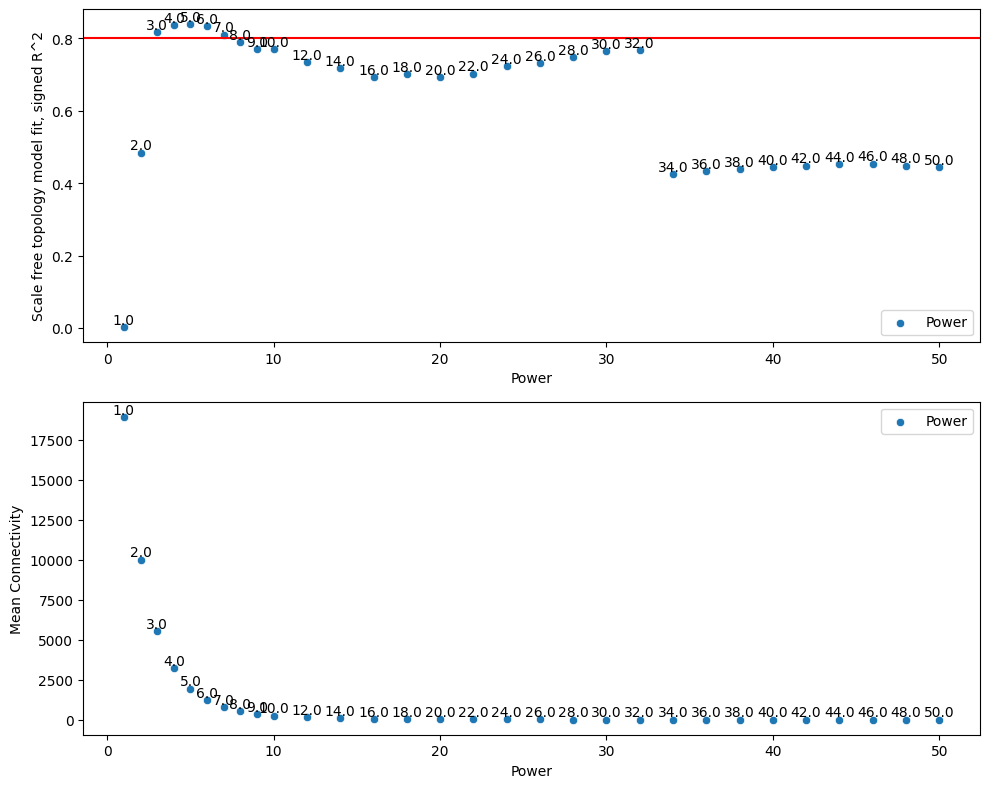

In [21]:
# Visualization to pick power using matplotlib and seaborn
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
sns.scatterplot(data=sft_data, x='Power', y='SFT.R.sq', label='Power')
for index, row in sft_data.iterrows():
    plt.text(row['Power'], row['SFT.R.sq'], str(row['Power']), ha='center', va='bottom')
plt.axhline(y=0.8, color='red')
plt.xlabel('Power')
plt.ylabel('Scale free topology model fit, signed R^2')

plt.subplot(2, 1, 2)
sns.scatterplot(data=sft_data, x='Power', y='mean.k.', label='Power')
for index, row in sft_data.iterrows():
    plt.text(row['Power'], row['mean.k.'], str(row['Power']), ha='center', va='bottom')
plt.xlabel('Power')
plt.ylabel('Mean Connectivity')

plt.tight_layout()
plt.show()

In [22]:
norm_counts = norm_counts.astype(float)

In [23]:
soft_power = 9
temp_cor = robjects.r['cor']
robjects.globalenv["cor"] = WGCNA.cor

# Memory estimate with respect to blocksize
bwnet = WGCNA.blockwiseModules(norm_counts,
                               maxBlockSize=4000,
                               TOMType="signed",
                               power=soft_power,
                               mergeCutHeight=0.25,
                               numericLabels=False,
                               randomSeed=1234,
                               verbose=3,
                               weights_x=robjects.NULL,
                               weights_y=robjects.NULL,
                               cosine=False)

robjects.globalenv["cor"] = stats.cor
     

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ....pre-clustering genes to determine blocks..
   Projective K-means:
   ..k-means clustering..
   ..merging smaller clusters...
Block sizes:
gBlocks
   1    2    3    4    5    6    7    8    9   10 
4000 4000 3999 3998 3997 3996 3996 3996 3292 2572 
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
 ..Working on block 2 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
 ....clustering..
 ....detecting

In [24]:
module_eigengenes = pandas2ri.rpy2py_dataframe(bwnet.rx('MEs')[0])

# Print out a preview
print(module_eigengenes)

             MEblue  MEsalmon   MEblack  MEmagenta  MEyellow     MEred  \
GSM907203  0.120216  0.059357 -0.036169  -0.111018 -0.055154 -0.118290   
GSM907204  0.101528  0.060243 -0.003728  -0.095833 -0.072260  0.003435   
GSM907205  0.155804  0.047704 -0.105041  -0.188661 -0.129571 -0.172967   
GSM907206  0.127405 -0.097133 -0.034217  -0.079415 -0.070617 -0.080133   
GSM907207  0.118111  0.028828 -0.104389   0.028383 -0.069347 -0.062997   
GSM907208  0.164184  0.035015 -0.169196  -0.126540 -0.127925 -0.144333   
GSM907209  0.134502 -0.074897  0.026009  -0.004693 -0.070498 -0.063748   
GSM907210  0.102036  0.076705  0.062812  -0.002651 -0.020909 -0.021066   
GSM907211  0.023022  0.083172  0.118984   0.137181 -0.028052  0.086008   
GSM907212  0.079241 -0.098471 -0.140509  -0.020337 -0.054824 -0.027817   
GSM907213  0.097093 -0.077666 -0.014920  -0.024802 -0.086651 -0.045240   
GSM907214  0.082671 -0.075218  0.001891  -0.000297 -0.077840 -0.058664   
GSM907215  0.076956  0.052606 -0.03975

In [25]:
# Get the number of genes for each module
module_colors = pd.DataFrame(robjects.r['as.data.frame'](bwnet.rx('colors')[0]))
module_counts = module_colors.iloc[:, 0].value_counts()
module_colors.columns = module_colors.iloc[0]
module_colors.columns
print(module_counts)

grey    1
Name: 0, dtype: int64


In [26]:
traits = colData
traits['disease_state_bin'] = [1 if '(HCM)' in state else 0 for state in traits['disease_state']]
traits = traits[['disease_state_bin']]
traits

C:\Users\Prahas\AppData\Local\Temp\ipykernel_21440\3545913209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traits['disease_state_bin'] = [1 if '(HCM)' in state else 0 for state in traits['disease_state']]


,disease_state_bin
GSM907203,1
GSM907204,1
GSM907205,1
GSM907206,1
GSM907207,1
GSM907208,1
GSM907209,1
GSM907210,1
GSM907211,1
GSM907212,1


In [27]:
# Convert severity column to a factor with specified levels

r_colData = pandas2ri.py2rpy(colData)
r.assign('r_colData', r_colData)
# Apply the factor conversion to the 'severity' column
r.assign('r_colData', r_colData)

robjects.r('r_colData <- as.data.frame(r_colData)')
robjects.r('r_colData$disease_state <- factor(r_colData$disease_state, levels = c("Healthy", "(HCM)"))')
# Convert 'colData' back to a pandas DataFrame
colData = pandas2ri.rpy2py_dataframe(r_colData)

severity_out = WGCNA.binarizeCategoricalColumns(colData['disease_state'],
                                                includePairwise=False,
                                                includeLevelVsAll=True,
                                                minCount=1)
severity_out = pandas2ri.rpy2py_dataframe(severity_out)
severity_out = severity_out.set_index(traits.index)
traits = traits.join(severity_out)
traits['data.Healthy.vs.all'] = (colData['disease_state'] == 'Healthy').astype(int)
pd.set_option('display.max_rows', None)
traits

,disease_state_bin,data.hypertrophic cardiomyopathy (HCM).vs.all,data.Healthy.vs.all
GSM907203,1,1.0,0
GSM907204,1,1.0,0
GSM907205,1,1.0,0
GSM907206,1,1.0,0
GSM907207,1,1.0,0
GSM907208,1,1.0,0
GSM907209,1,1.0,0
GSM907210,1,1.0,0
GSM907211,1,1.0,0
GSM907212,1,1.0,0


In [28]:
# Define numbers of genes and samples
nSamples = norm_counts.shape[1]
nGenes = norm_counts.shape[0]

In [29]:
print(len(traits.index))
print(len(module_eigengenes))

140
140


In [30]:
# Calculate Pearson's correlation using cor from stats package
robjects.globalenv["cor"] = stats.cor

module_trait_corr = robjects.r['cor'](module_eigengenes, traits, use='p')

robjects.globalenv["cor"] = WGCNA.cor
# Calculate p-values using corPvalueStudent from WGCNA package
module_trait_corr_pvals = WGCNA.corPvalueStudent(module_trait_corr, nSamples)

# Convert the results to Python objects
module_trait_corr = np.array(module_trait_corr)

# Convert module_trait_corr_pvals to a numpy array
module_trait_corr_pvals = np.array(module_trait_corr_pvals)

module_trait_corr = pd.DataFrame(module_trait_corr)

# Convert module_trait_corr_pvals to a pandas DataFrame
module_trait_corr_pvals = pd.DataFrame(module_trait_corr_pvals)
module_trait_corr

,0,1,2
0,0.457720,0.457720,-0.457720
1,0.006367,0.006367,-0.006367
2,-0.092297,-0.092297,0.092297
3,-0.162471,-0.162471,0.162471
4,-0.597543,-0.597543,0.597543
5,-0.132851,-0.132851,0.132851
6,-0.100077,-0.100077,0.100077
7,-0.290553,-0.290553,0.290553
8,-0.173757,-0.173757,0.173757
9,-0.007860,-0.007860,0.007860


In [31]:
# Visualize module-trait association as a heatmap
heatmap_data = pd.DataFrame(module_trait_corr)
heatmap_data.columns = traits.columns
heatmap_data.index = module_eigengenes.columns
heatmap_data


,disease_state_bin,data.hypertrophic cardiomyopathy (HCM).vs.all,data.Healthy.vs.all
MEblue,0.457720,0.457720,-0.457720
MEsalmon,0.006367,0.006367,-0.006367
MEblack,-0.092297,-0.092297,0.092297
MEmagenta,-0.162471,-0.162471,0.162471
MEyellow,-0.597543,-0.597543,0.597543
MEred,-0.132851,-0.132851,0.132851
MEgreen,-0.100077,-0.100077,0.100077
MEturquoise,-0.290553,-0.290553,0.290553
MEbrown,-0.173757,-0.173757,0.173757
MEgreenyellow,-0.007860,-0.007860,0.007860


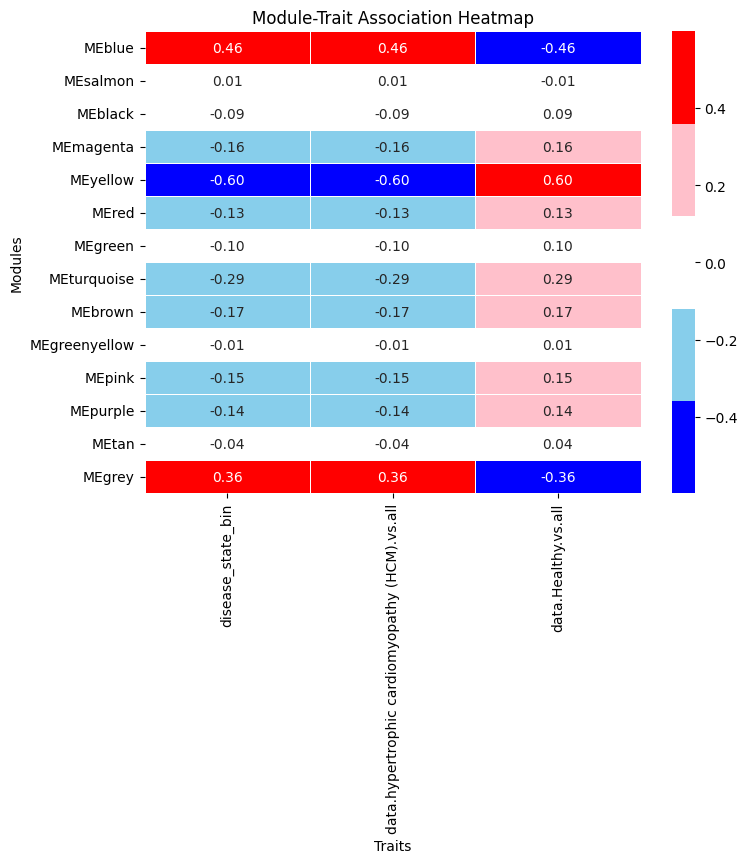

In [32]:
# Set up the heatmap
plt.figure(figsize=(8, 6))
colors = ["#0000FF", "#87CEEB", "#FFFFFF", "#FFC0CB", "#FF0000"]

sns.heatmap(heatmap_data, cmap=colors, annot=True, fmt=".2f", linewidths=0.5)

# Set labels and title
plt.xlabel('Traits')
plt.ylabel('Modules')
plt.title('Module-Trait Association Heatmap')

# Display the plot
plt.show()

In [ ]:
def process_column(column):
    return module_gene_mapping[module_gene_mapping[column] == 'yellow'].index

if __name__ == '__main__':
    module_gene_mapping = pd.DataFrame(module_colors)
    print(module_gene_mapping.columns)
    yellow_columns = module_gene_mapping.columns[module_gene_mapping.columns == 'yellow']

    with multiprocessing.Pool() as pool:
        yellow_module_genes = pool.map(process_column, yellow_columns)

    print(yellow_module_genes)

Index(['grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'purple',
       'turquoise', 'turquoise',
       ...
       'grey', 'grey', 'grey', 'grey', 'turquoise', 'grey', 'turquoise',
       'brown', 'turquoise', 'turquoise'],
      dtype='object', name=0, length=37846)


In [ ]:
# 6B. Intramodular analysis: Identifying driver genes -------------
# Calculate the module membership and the associated p-values
robjects.globalenv["cor"] = stats.cor
module_membership_measure = robjects.r['cor'](module_eigengenes, norm_counts, use='p')
robjects.globalenv["cor"] = WGCNA.cor
module_membership_measure_pvals = robjects.r['corPvalueStudent'](module_membership_measure, nSamples)
# module_membership_measure_pvals = pandas2ri.rpy2py_dataframe(module_membership_measure_pvals)
print(module_membership_measure_pvals)


In [ ]:
# print(module_membership_measure_pvals.iloc[:10, :10])
robjects.globalenv["cor"] = stats.cor
# Calculate the gene significance and associated p-values
gene_significance_corr = robjects.r['cor'](norm_counts, traits['data.hypertrophic cardiomyopathy (HCM).vs.all'][0], use='p')
robjects.globalenv["cor"] = WGCNA.cor
gene_significance_corr_pvals = robjects.r['corPvalueStudent'](gene_significance_corr, nSamples)

gene_significance_corr_pvals_df = pandas2ri.rpy2py_dataframe(gene_significance_corr_pvals)
gene_significance_corr_pvals_df = gene_significance_corr_pvals_df.sort_values('V1').head(25)

print(gene_significance_corr_pvals_df)